In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
# Firmographic file
df_firmographic = pd.read_csv("Clean Data/firmographic_clean_20230323.csv", dtype={'B2B_ADDR_ZIP5':'str'})

In [3]:
# Usage file
df_usage = pd.read_csv("Clean Data/usage_clean_20230314.csv")

In [4]:
#test join

df_firmographic_join = df_firmographic[['unique_identifier','B2B_ADDR_STATE']].copy()

In [18]:
df = df_firmographic_join.merge(df_usage, on='unique_identifier', how='left')
print(df)

                      unique_identifier B2B_ADDR_STATE    usage    status
0      0001230a214b39e0e5c463bfe440fb15             OH  81440.0  FINALLED
1      000345e997e72b61b990d2689c76427f             PA    556.3    ACTIVE
2      0003c4d7aeb24f319f0d7c6ddb60bb8f             OH  32564.0  FINALLED
3      00082675e86a9f3cf5fdcc5d4cd9114d             IL   5519.0  FINALLED
4      00095201031df44962513f378842d521             IL   5946.0    ACTIVE
...                                 ...            ...      ...       ...
59881  fffce8918ebaae88423f62806f22c414             MA  11080.0    ACTIVE
59882  fffd155082881fa090b08ca6ceed7005             TX  93876.0    ACTIVE
59883  fffe3fcb6ca0166ec15af3958ac145e8             MA   9072.0    ACTIVE
59884  fffef4c75ffee0863657cb631c4245cf             NJ      NaN       NaN
59885  fffffb3ada2f6e1000a34c41725268ff             IL  20892.0  FINALLED

[59886 rows x 4 columns]


In [6]:
df = df.dropna()
#1 NA row: fffef4c75ffee0863657cb631c4245cf

In [7]:
df.to_csv('Clean Data/join_dataset_20230323.csv', index=False)

In [25]:
df_state = df.loc[df['B2B_ADDR_STATE'] == 'GA']

In [26]:
df_state

,unique_identifier,B2B_ADDR_STATE,usage,status
480,0203a96b342d6ec27cb53979cf0d80d7,GA,4928.0,FINALLED
502,0218aebaa87fb53f7de1f7a5f82987f7,GA,9137.0,FINALLED
527,0237a4f20901ec31854e8a55af3b79a4,GA,11604.0,FINALLED
790,035f7f3152cf8c016a3d68e7eedc5025,GA,6513.0,ACTIVE
902,03e294901bf8ae0b73a6b063166689cc,GA,5055.0,ACTIVE
...,...,...,...,...
57553,f5fd2f557f07c2438b784ad3af9a83c9,GA,16039.0,ACTIVE
57818,f70fcc7c9bdcfc83bf3a7e40df85e4ab,GA,5402.0,FINALLED
58263,f8e54d762971f01e584a851d1a3fadc2,GA,25400.0,ACTIVE
58699,fafa89f5370e90b3aa558575eea703fb,GA,929.0,ACTIVE


In [27]:
df_state.loc[:, 'usage'] = df_state['usage']*1000

/var/folders/74/hvvyjn317tj9gl3n3gpqs3fw0000gn/T/ipykernel_51306/1338026016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state.loc[:, 'usage'] = df_state['usage']*1000


In [28]:
df_state

,unique_identifier,B2B_ADDR_STATE,usage,status
480,0203a96b342d6ec27cb53979cf0d80d7,GA,4928000.0,FINALLED
502,0218aebaa87fb53f7de1f7a5f82987f7,GA,9137000.0,FINALLED
527,0237a4f20901ec31854e8a55af3b79a4,GA,11604000.0,FINALLED
790,035f7f3152cf8c016a3d68e7eedc5025,GA,6513000.0,ACTIVE
902,03e294901bf8ae0b73a6b063166689cc,GA,5055000.0,ACTIVE
...,...,...,...,...
57553,f5fd2f557f07c2438b784ad3af9a83c9,GA,16039000.0,ACTIVE
57818,f70fcc7c9bdcfc83bf3a7e40df85e4ab,GA,5402000.0,FINALLED
58263,f8e54d762971f01e584a851d1a3fadc2,GA,25400000.0,ACTIVE
58699,fafa89f5370e90b3aa558575eea703fb,GA,929000.0,ACTIVE


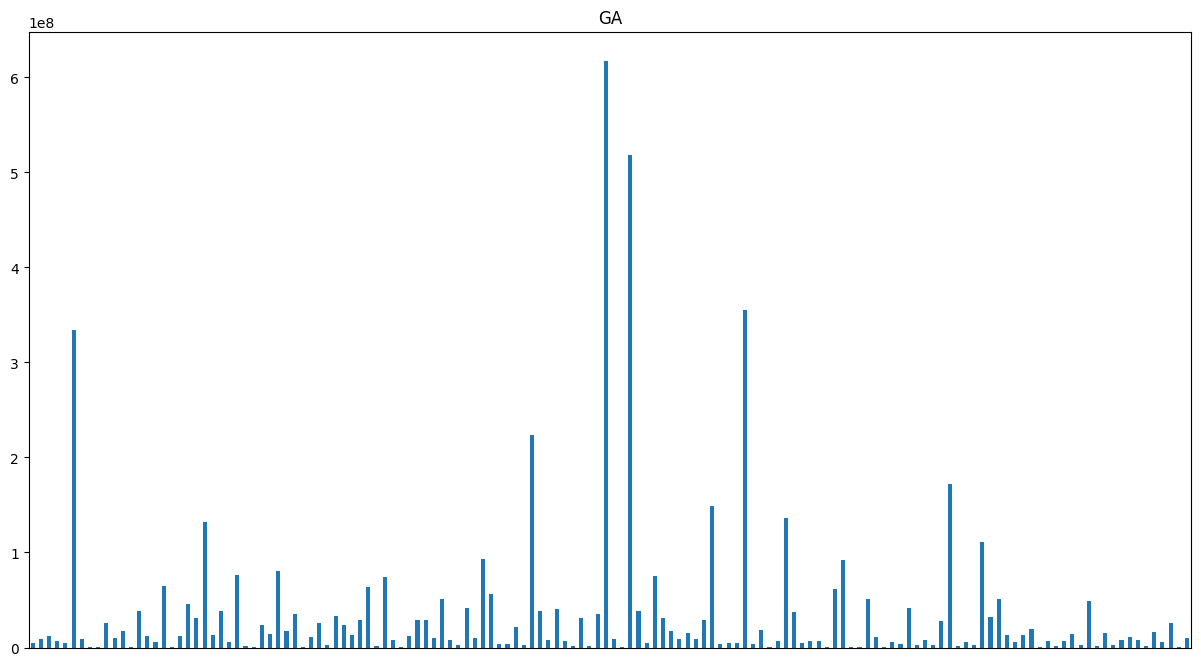

In [29]:
plt.figure(figsize = [15,8])
plot = df_state['usage'].plot.bar(title = 'GA')
plot.axes.xaxis.set_visible(False)

In [7]:
US_state = df['B2B_ADDR_STATE'].unique()
print(US_state)

['OH' 'PA' 'IL' 'MA' 'TX' 'NJ' 'MD' 'NY' 'CT' 'GA' 'NH' 'DE' 'MI' 'IN'
 'VA' 'KY' 'DC' 'ME' 'RI' 'CA']


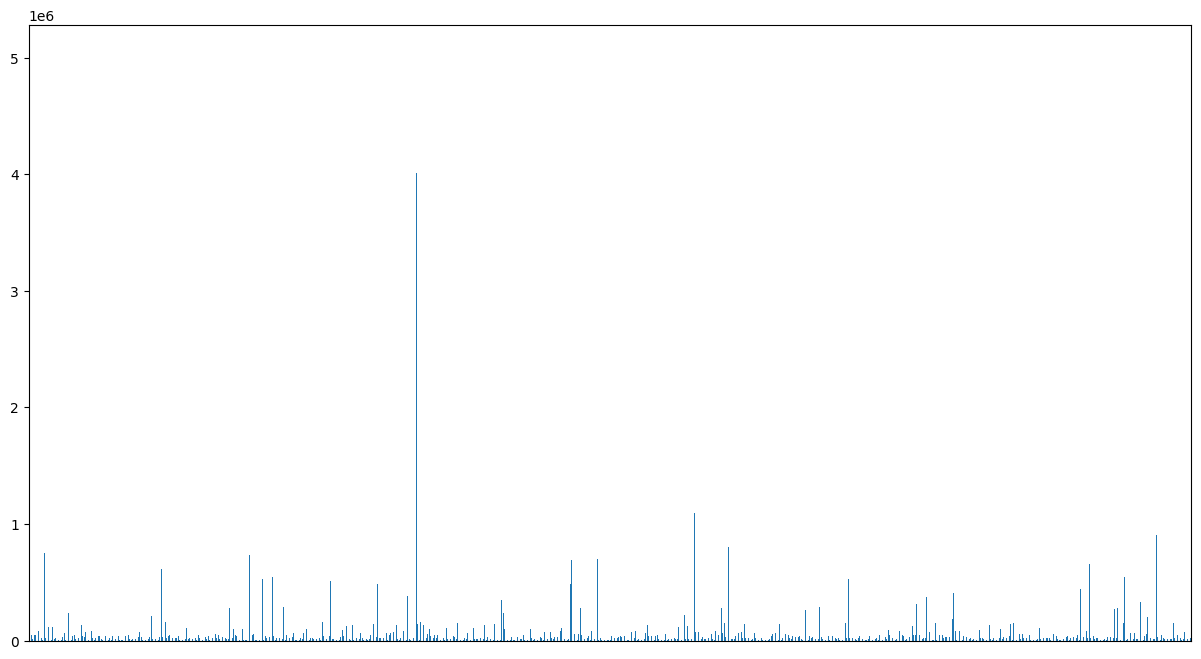

In [11]:
df_state = df.loc[df['B2B_ADDR_STATE'] == 'OH']
plot = df_state['usage'].plot.bar(figsize=[15,8])
plot.axes.xaxis.set_visible(False)


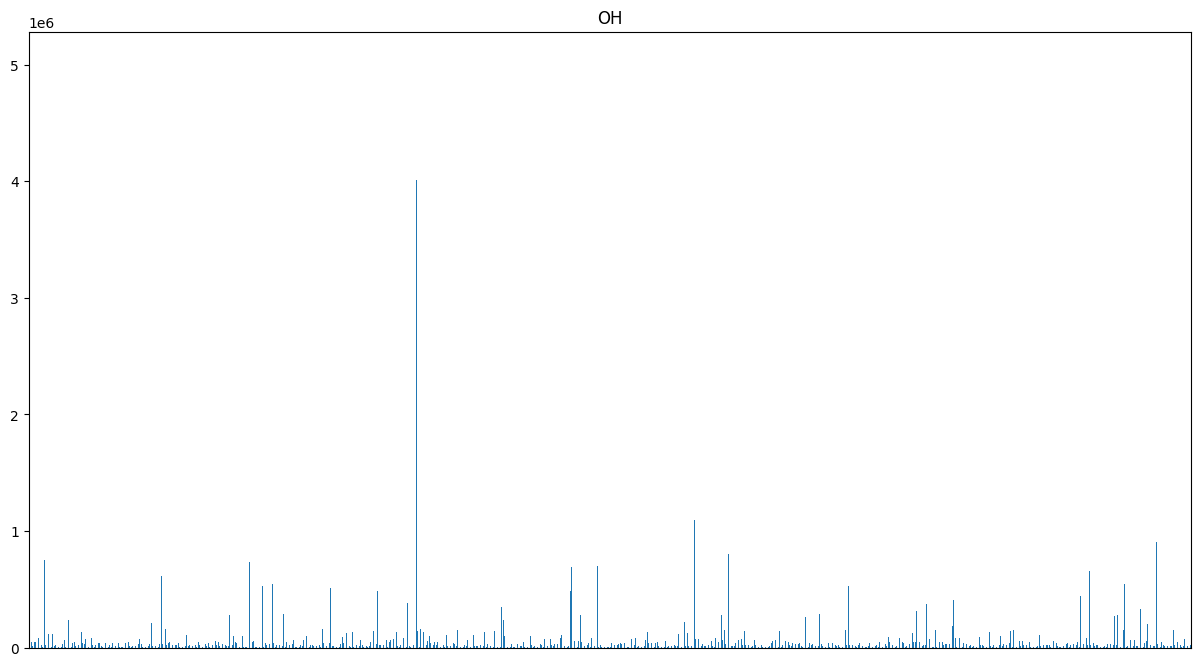

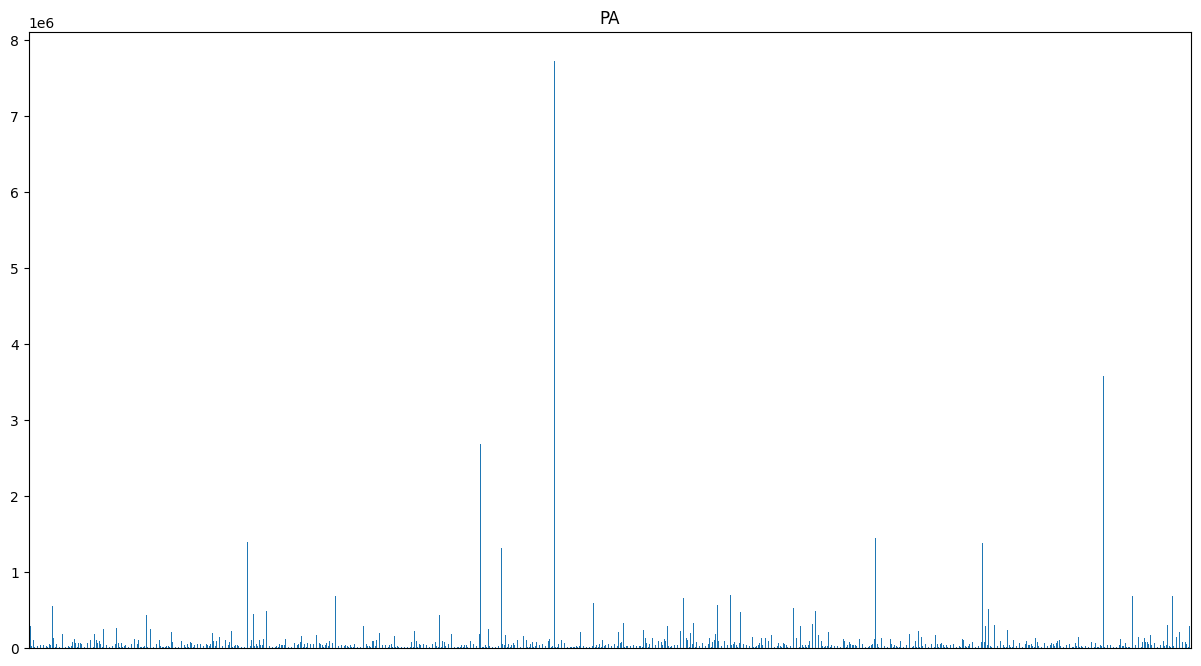

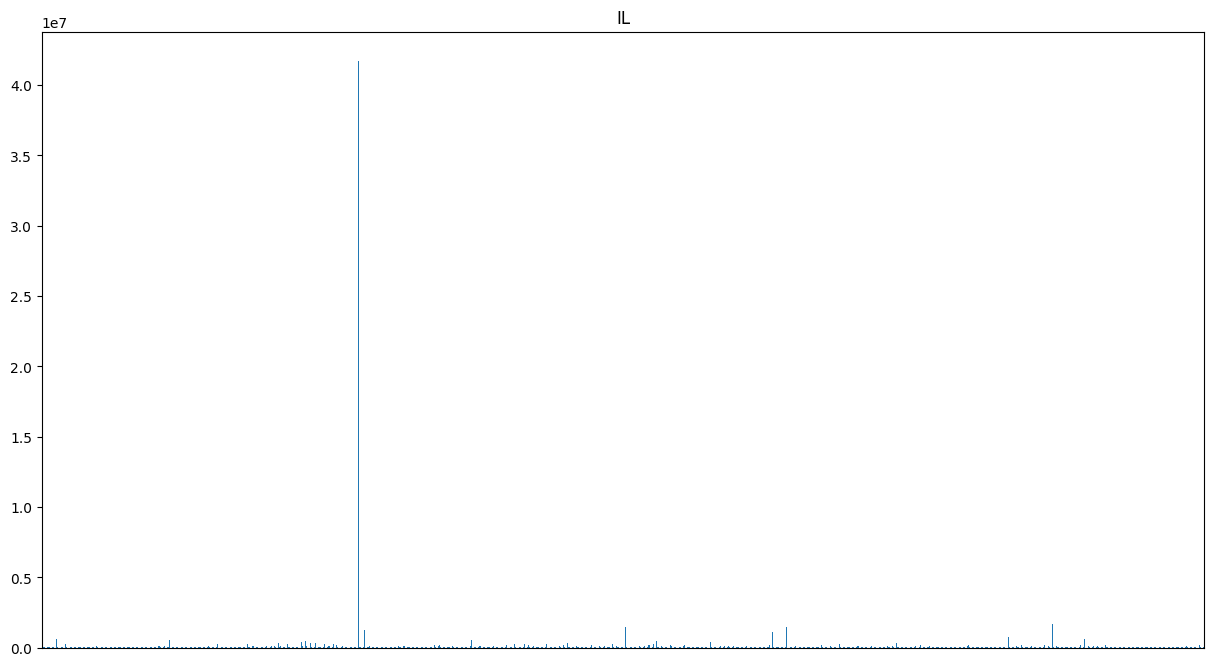

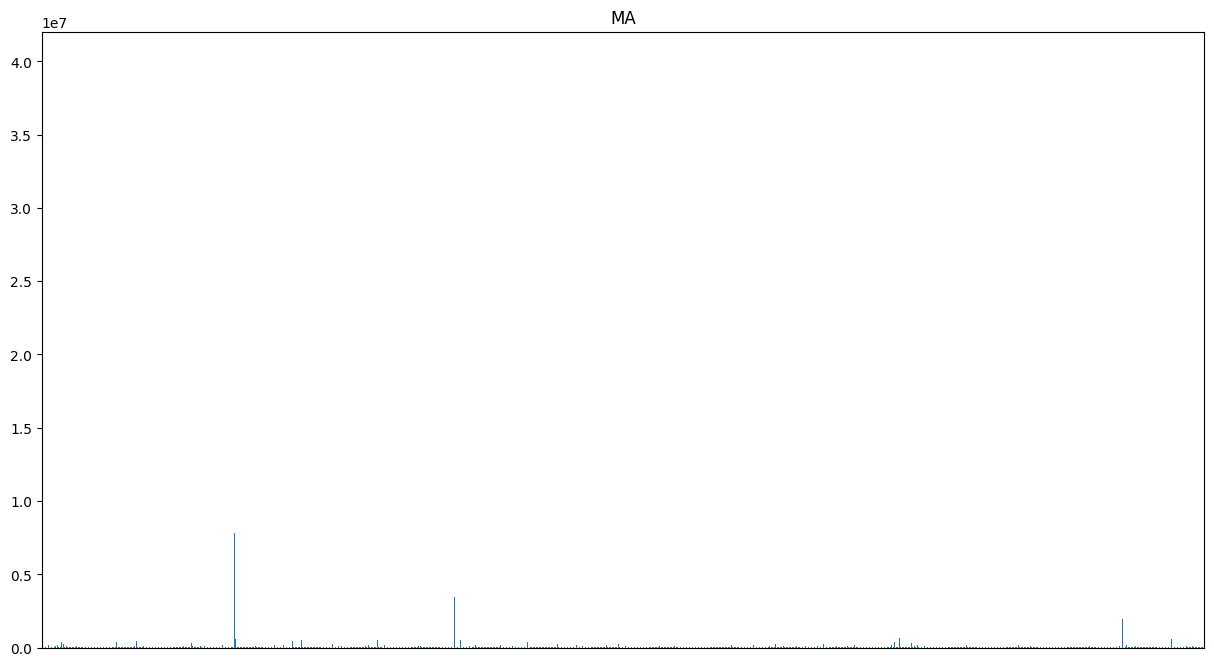

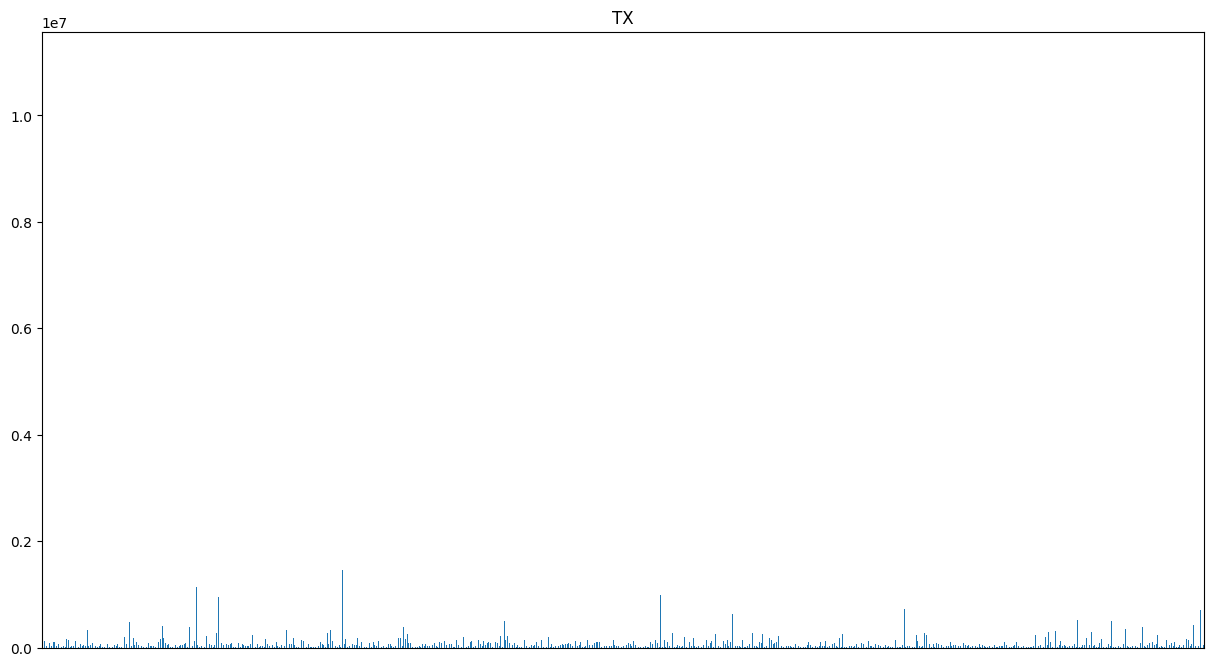

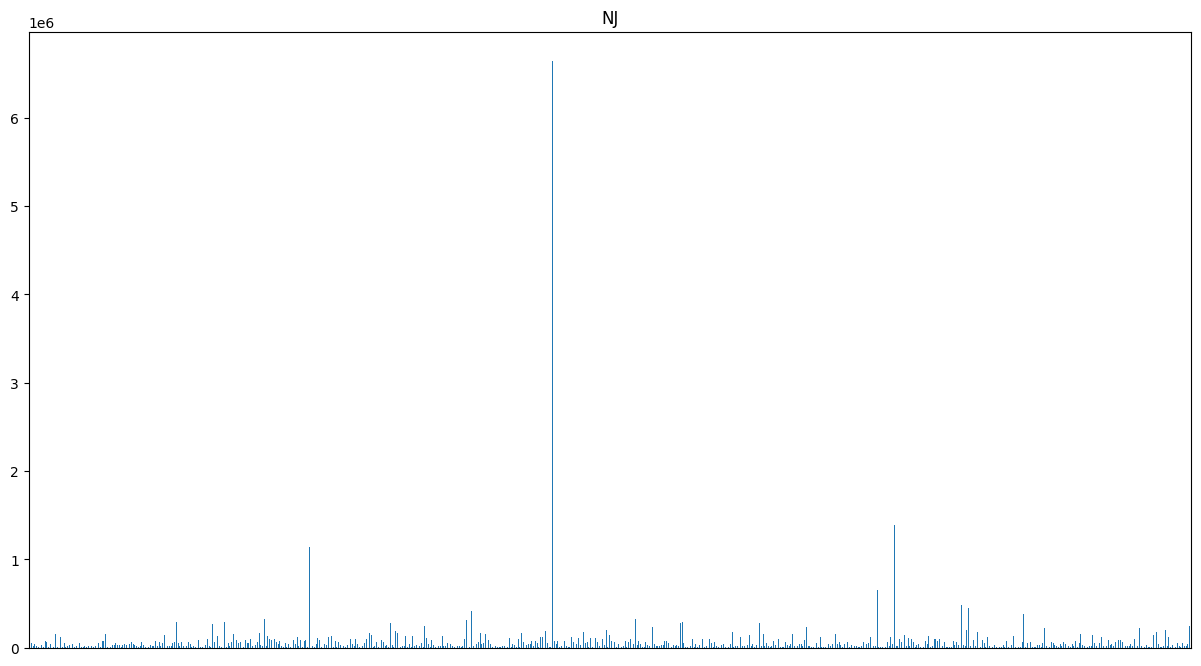

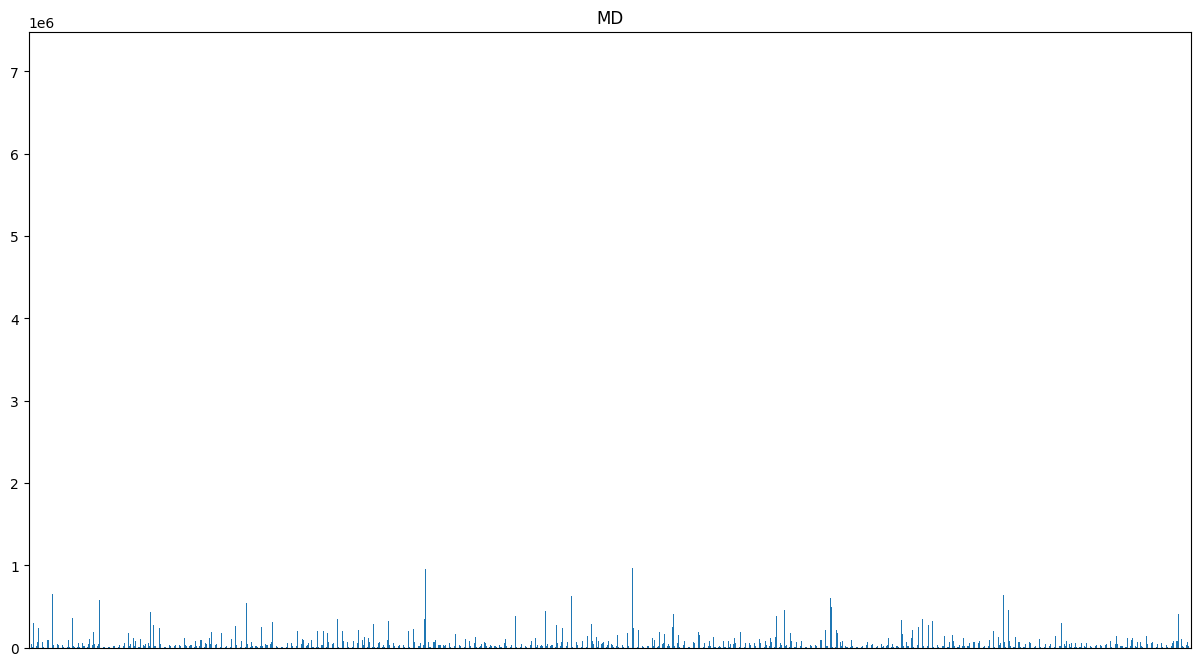

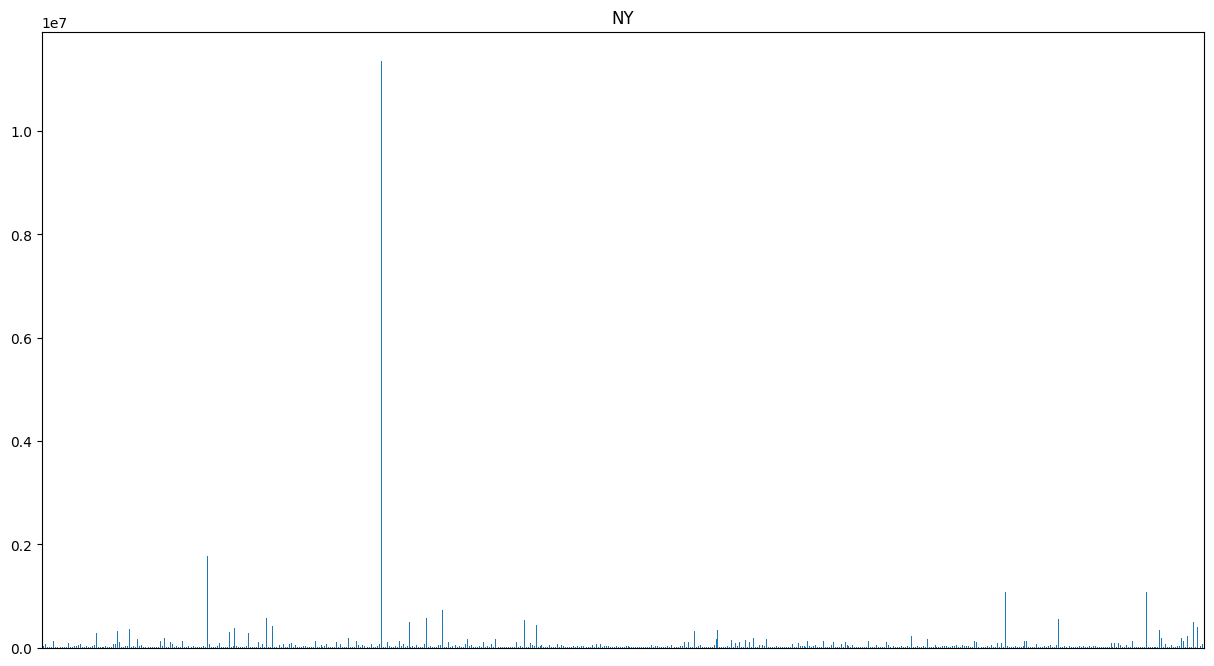

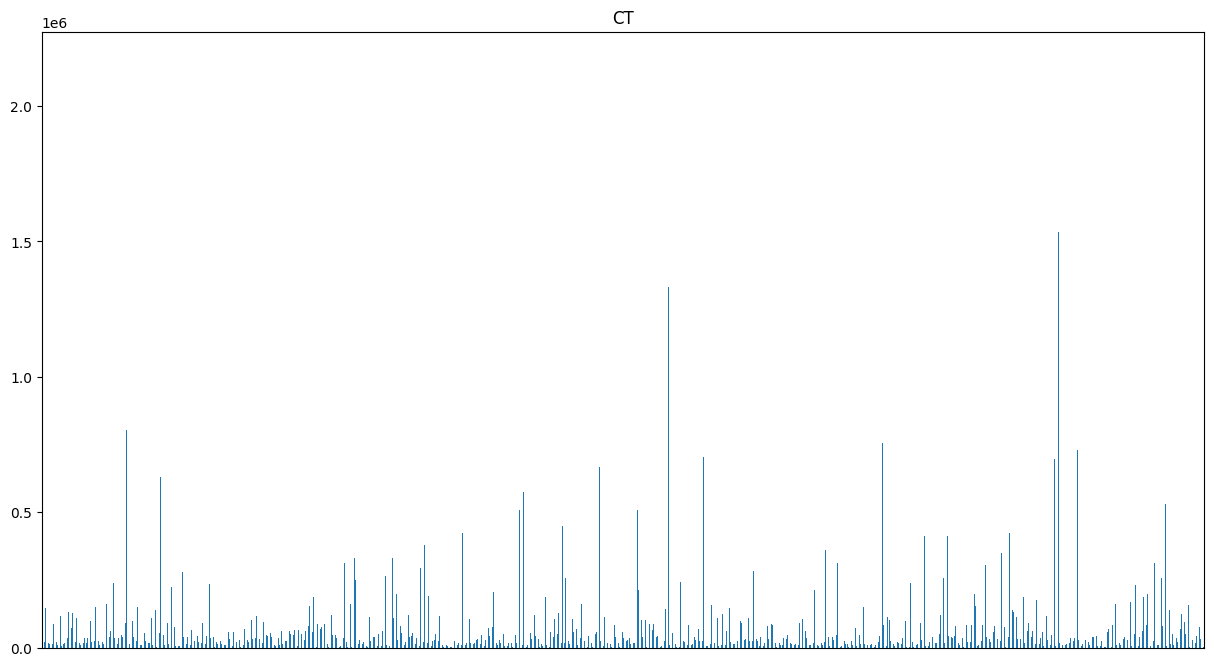

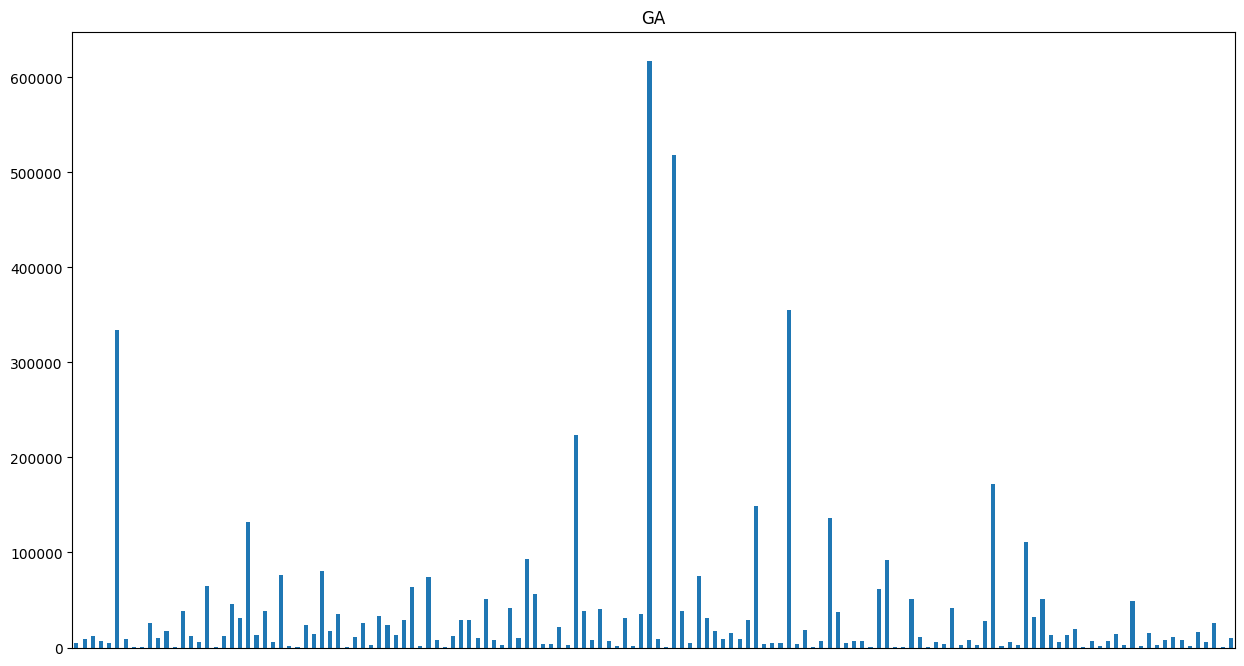

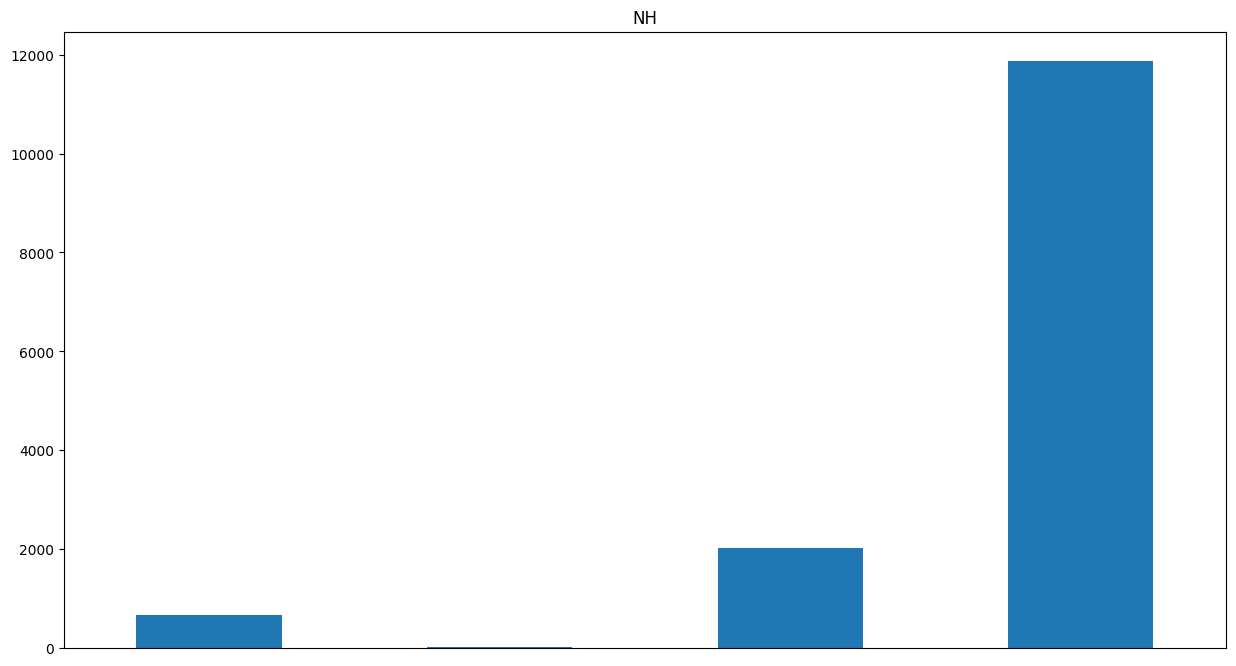

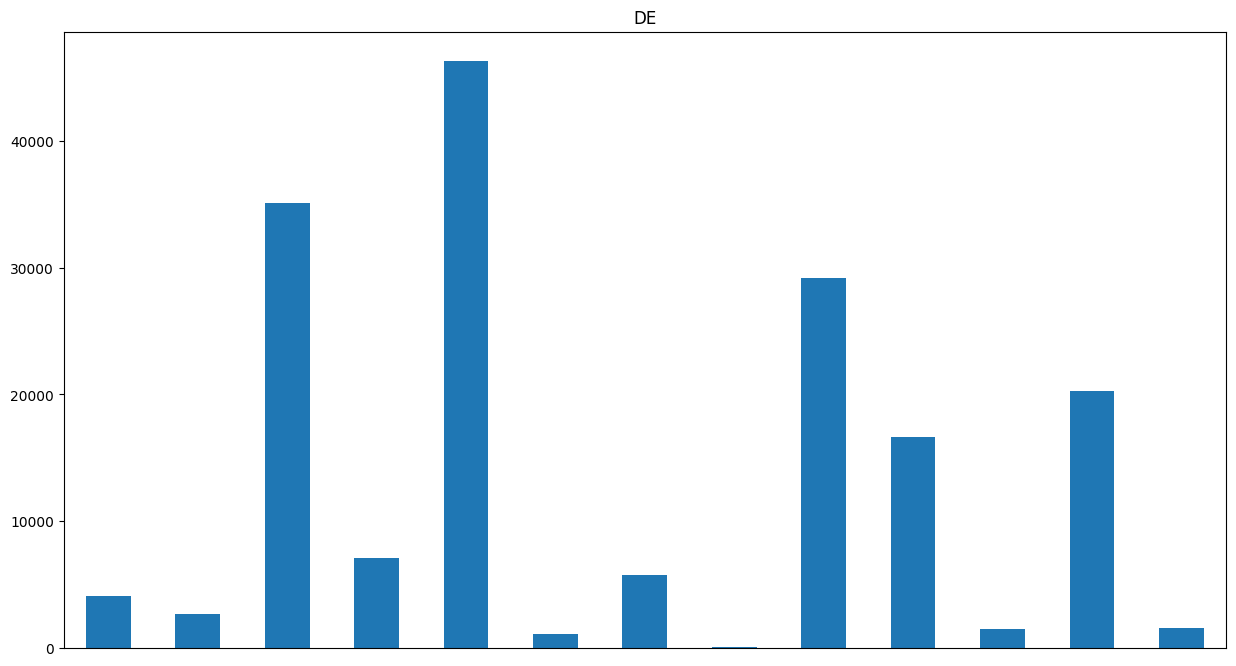

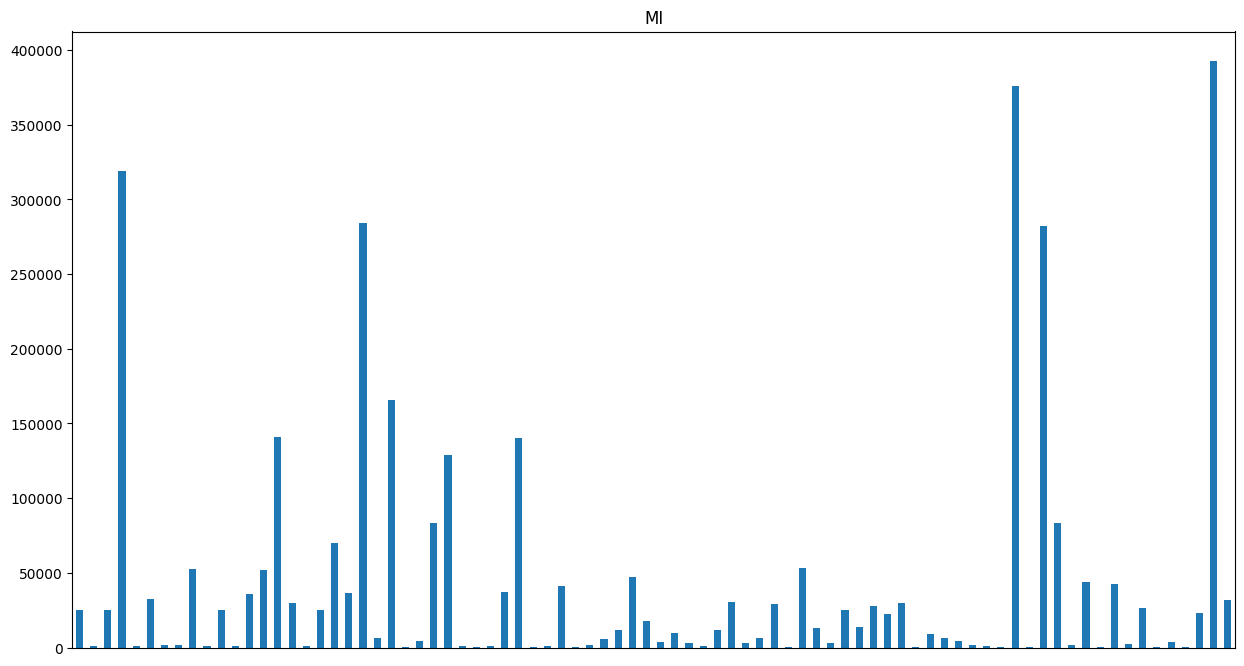

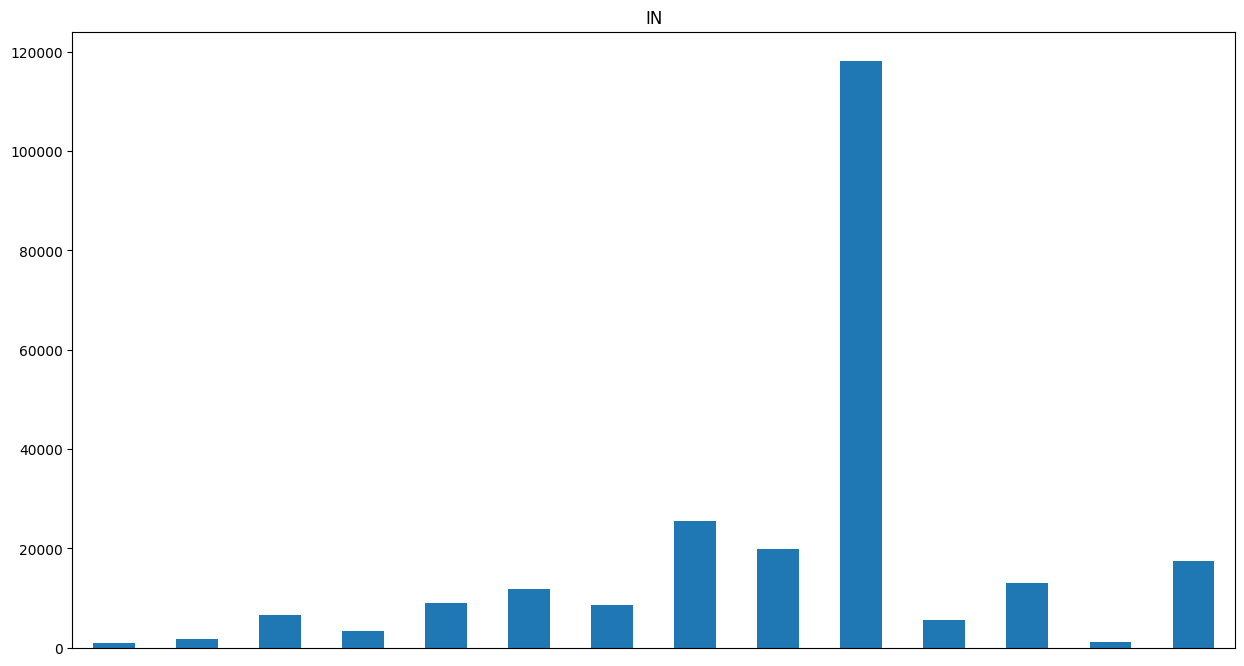

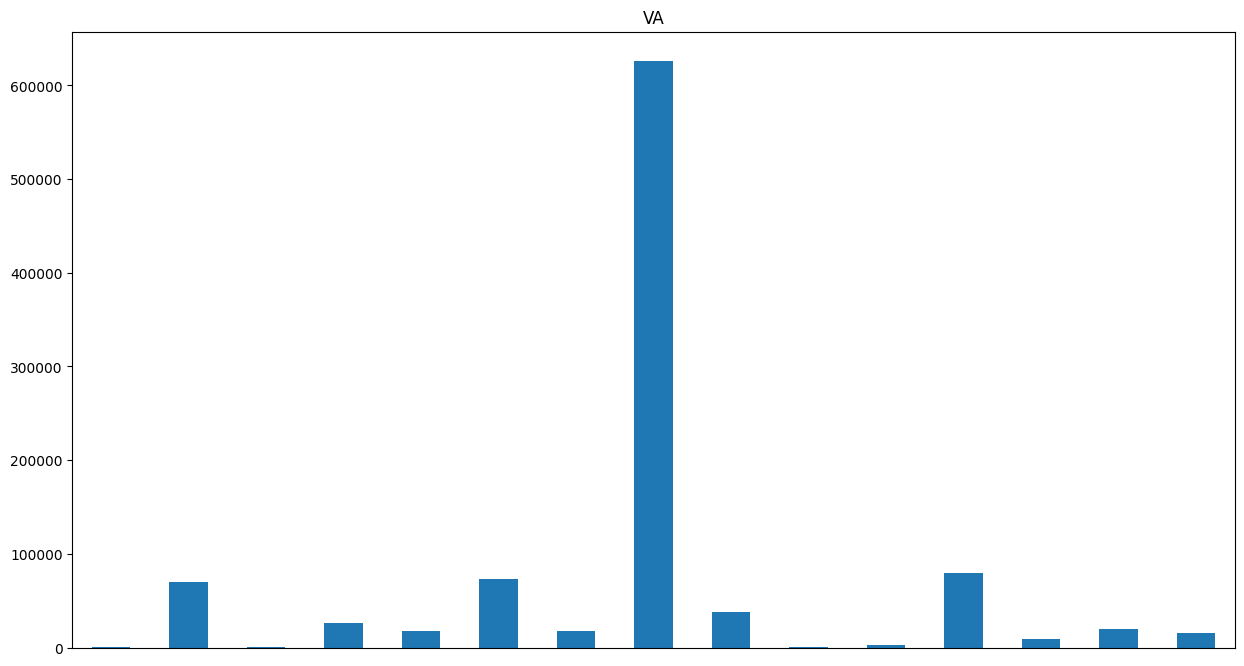

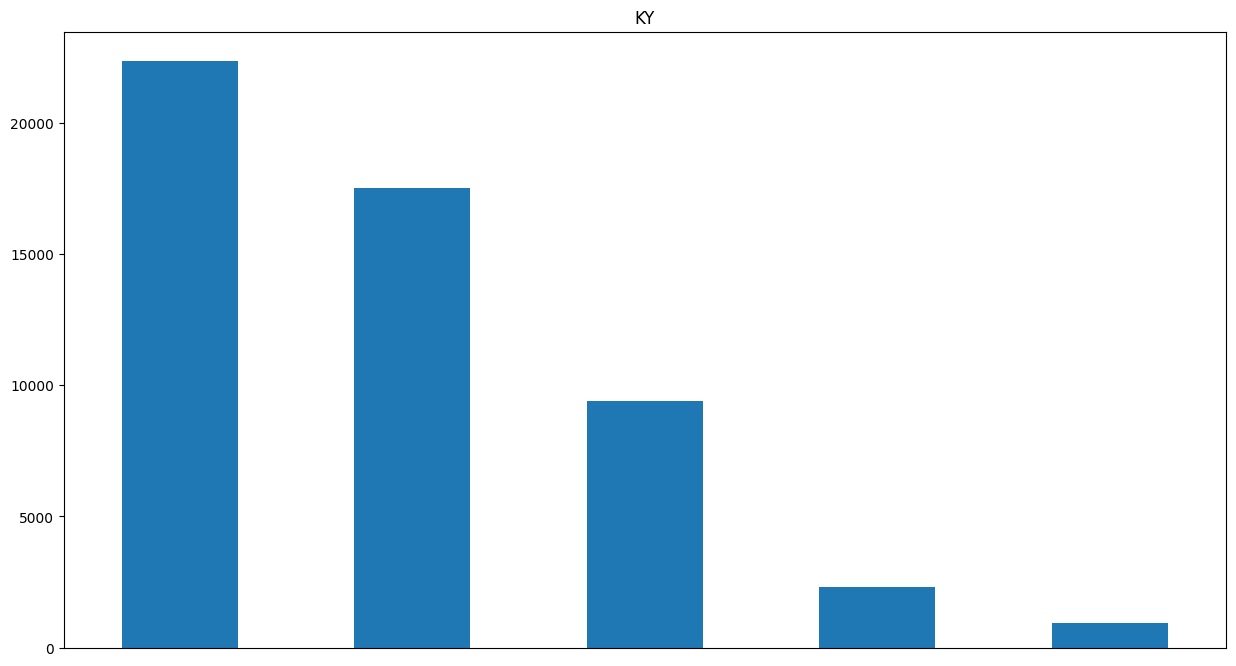

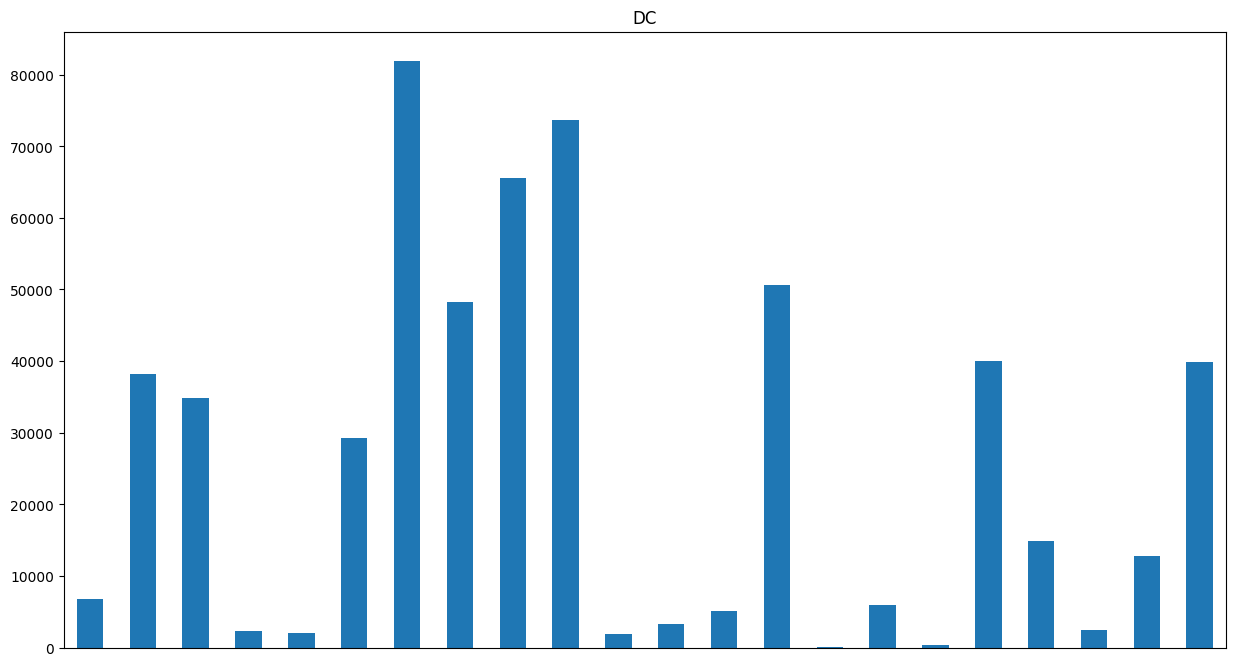

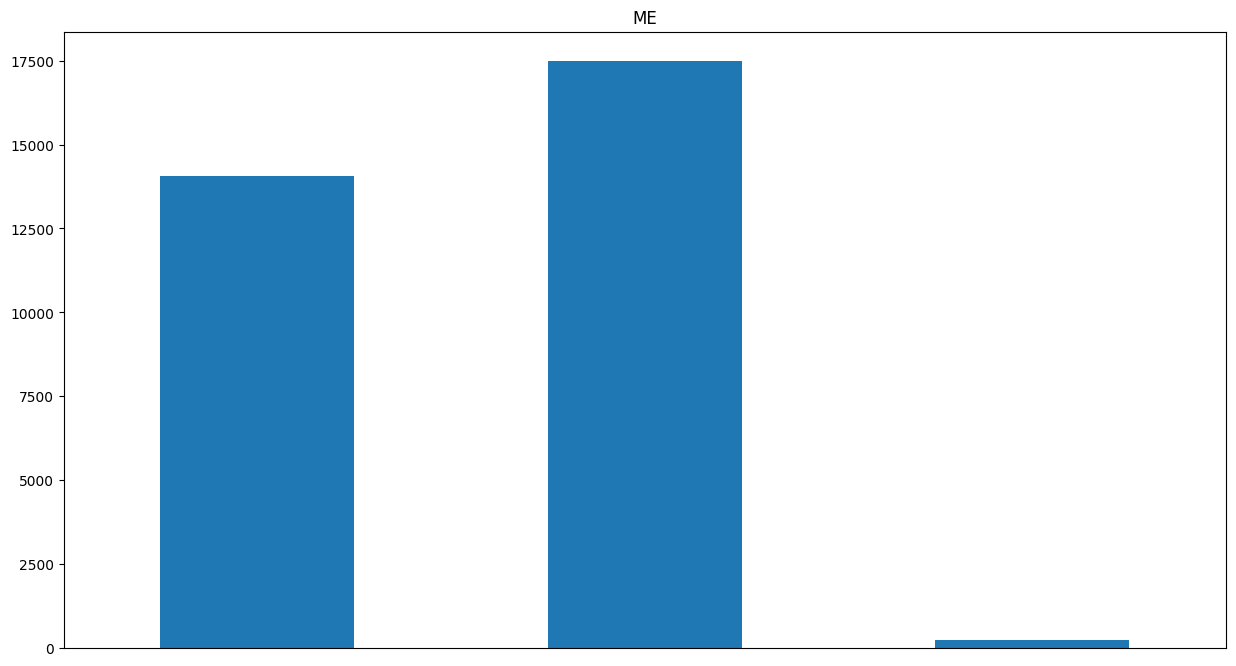

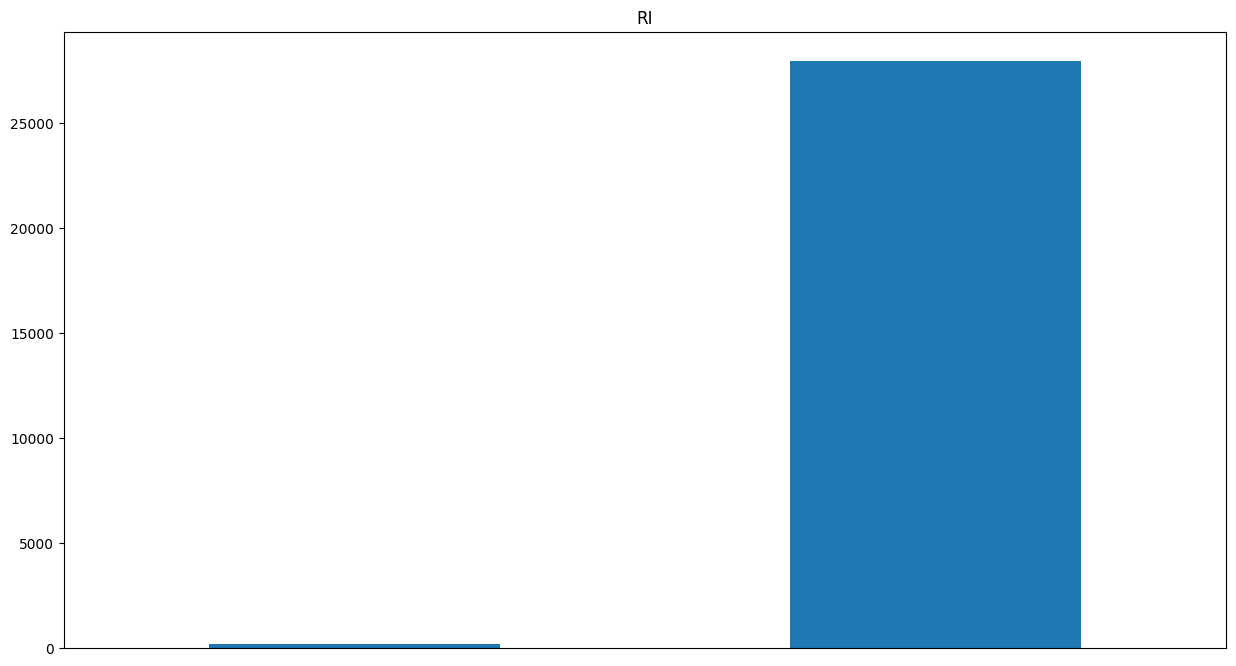

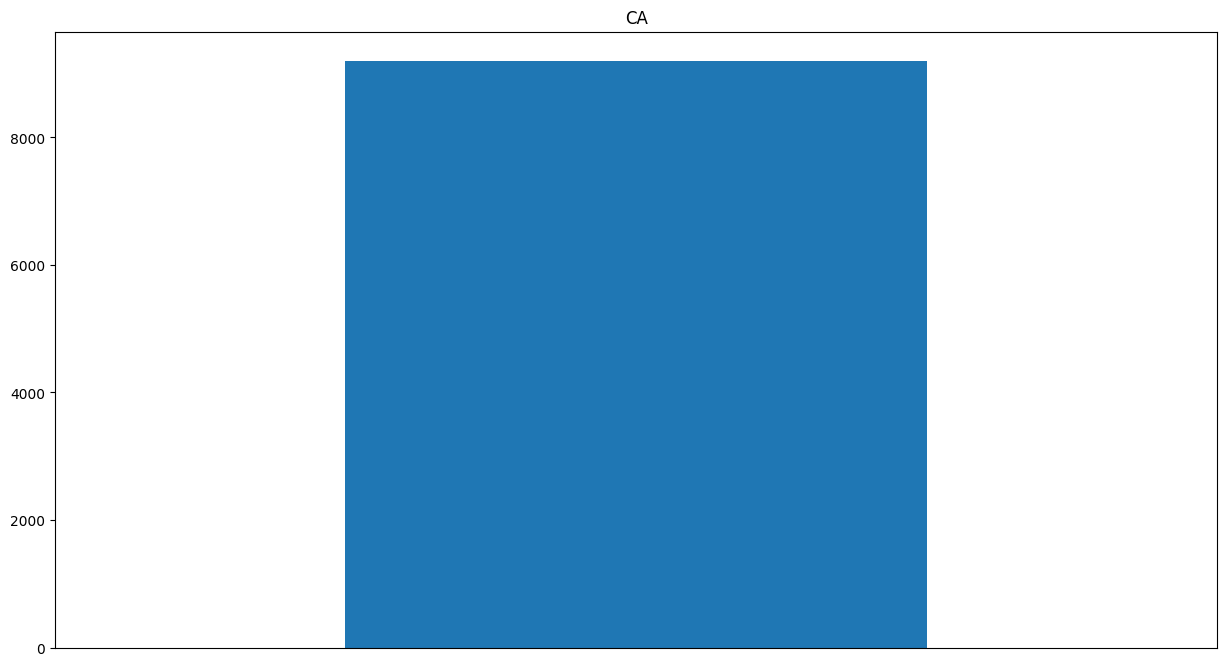

In [14]:
for s in US_state:
    plt.figure(figsize = [15,8])
    df_state = df.loc[df['B2B_ADDR_STATE'] == s]
    plot = df_state['usage'].plot.bar(title = s)
    plot.axes.xaxis.set_visible(False)